In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns

%matplotlib inline

In [2]:
# load the training and testing data set
path = "~/Data_Scientist/Kaggle/tweet-sentiment-extraction/"

train_df = pd.read_csv(path + "train.csv")
test_df = pd.read_csv(path + "test.csv")

In [3]:
# take a look at the shape of the 2 data sets
train_df.shape, test_df.shape

((27481, 4), (3534, 3))

In [4]:
# Preview the training set
train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
# Preview the testing set
test_df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [6]:
# take a look of all setimemt types
train_df["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

Text(0.5, 0, 'Testing Set')

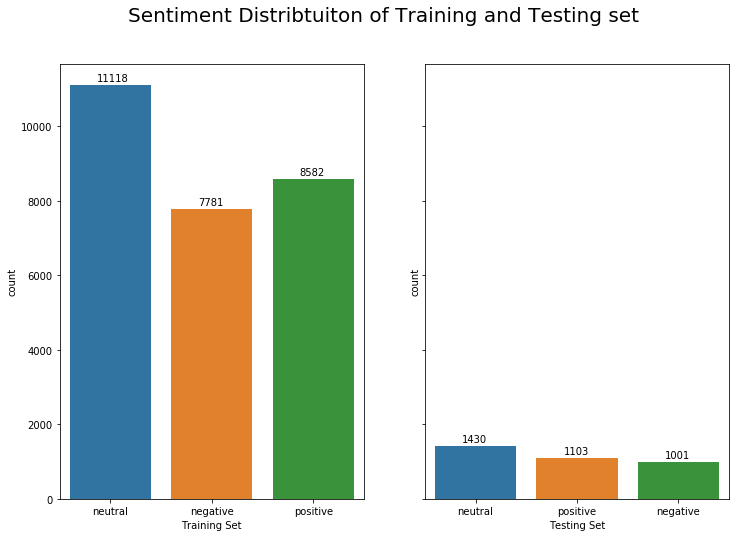

In [7]:
# plot the sentiment distribution for the training and testing sets
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,8)) # create a subplot and set the figure size
fig.suptitle("Sentiment Distribtuiton of Training and Testing set", fontsize=20) # set a bigger font size

# plot the distribution for the Training Set
sns.countplot(x="sentiment", data =train_df, ax=axs[0]) 

# annotate the percentage on top of each bar for Training Set
for i in axs[0].patches: 
    axs[0].text(i.get_x() + i.get_width()/3,           # set the text placement for x-axis
            i.get_height()+100,                        # set the text placement for y-axis
            i.get_height(),                            # set the value to show on top of each par
            color="black")                             # set the color to black
    
sns.countplot(x="sentiment", data =test_df, ax=axs[1])

# annotate the percentage on top of each bar for Testing Set
for i in axs[1].patches: 
    axs[1].text(i.get_x() + i.get_width()/3,           # set the text placement for x-axis
            i.get_height()+100,                        # set the text placement for y-axis
            i.get_height(),                            # set the value to show on top of each par
            color="black")                             # set the color to black

axs[0].set_xlabel("Training Set") # rename the x-axis for the subplot on the left to Training Set
axs[1].set_xlabel("Testing Set") # rename the x-axis for the subplot on the right to Testing Set

1. The Training set has significantly more rows than the Testing Set. <br>
2. For both the Training and Testing Sets, there are more rows idenified as neutural. <br>

In [8]:
# look at an example for neutral text
train_df[train_df["sentiment"] == "neutral"]["text"].values[0]

' I`d have responded, if I were going'

In [9]:
# look at an example for neutral selected_text
train_df[train_df["sentiment"] == "neutral"]["selected_text"].values[0]

'I`d have responded, if I were going'

From the example above, it prompts me to think how many selected texts are identical to the text

In [10]:
# Take a look at what a selected neutural text is like
(train_df[train_df["sentiment"] == "neutral"]["selected_text"] == train_df[train_df["sentiment"] == "neutral"]["text"]).value_counts()

True     5930
False    5188
dtype: int64

In [11]:
# create a dataframe that has all the neutral sentiment
n_train = train_df[train_df["sentiment"] == "neutral"]
n_train.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
10,2339a9b08b,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral


In [12]:
# take a look at the first example where selected text is not the same as text
n_train.loc[n_train["text"] != n_train["selected_text"]].iloc[0]

textID                                     cb774db0d1
text              I`d have responded, if I were going
selected_text     I`d have responded, if I were going
sentiment                                     neutral
Name: 0, dtype: object